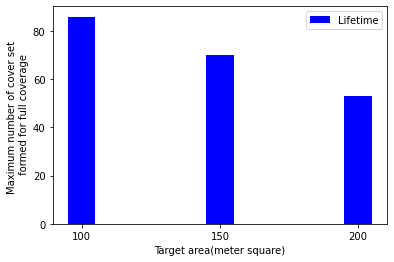

In [16]:
import numpy as np
import pandas as pd
import random
import Module as external
import statistics
import sys
import copy
import matplotlib.pyplot as plt
tar = 50 #int(input("Enter the number of targets:- "))
sen =  100 #int(input("Enter the number of sensors:- "))
#grid_size = 150
len_of_coverage = list()
temp_graph_list = list()
Rsi = 50
E=10
sensing_cost = 5
packet_size = 1000
targets_cover = 0
avg = 0
count = 0
Lifetime_for_each_iteration = []
lifetime = dict()

temp_sen_list = list()
temp_maxi_list= list()
for grid_size in range(100,201,50):
    temp_count = 0
    tar_Set = set()
    
    temp_sen_list.append(grid_size)
    temp_list_cover = list()
    RE = np.full(sen,E,dtype=np.float64)
    RE_loop_start = copy.deepcopy(RE) 
    T = np.random.randint(0, grid_size+1, size=(tar, 2))
    S = np.random.randint(0, grid_size+1, size=(sen, 2))
    sink_node = np.random.randint(0, grid_size+1, size=(1, 2))
    dist = external.distTargetSensor(S,T)
    cover_targets= (dist<=Rsi).astype(int)
    not_covered = list()
    ST_map = dict()
    count_map = dict()
    temp1 = np.where(~cover_targets.any(axis=1))[0]
    not_covered = temp1.tolist()
    n = len(cover_targets)
    m = len(cover_targets[0])
    for x in range(n):
        sensors_covering_target = list()
        count = 0
        for y in range(m):
            if(cover_targets[x][y] == 1):
                count = count+1
                count_map[x] = count
                sensors_covering_target.append(y)
                ST_map[x] = sensors_covering_target
    temp_tuple = copy.deepcopy(ST_map)
    min_val = min([len(ST_map[ele]) for ele in ST_map])
    T_critical = []
    for ele in ST_map:
        if len(ST_map[ele]) == min_val:
            T_critical.append(ele)
    S_critical_list=[ST_map[k] for k in T_critical if k in ST_map]
    first_tuple_list = [tuple(lst) for lst in S_critical_list]
    S_critical = set(first_tuple_list)
    S_all = ST_map.keys()
    NC_Target = S_all - T_critical
    SN_critical = [ST_map[k] for k in NC_Target if k in ST_map]
    sensor_map = {}
    for sm in range(m):
        count = 0
        for smg in range(n):
            if(cover_targets[smg][sm] == 1):
                count = count+1
                sensor_map[sm] = count            
    target_Set = set()
    sensor_Set = set()
    reserve_Set = set()
    continue_loop = len(T_critical)
    temp_dict = dict()
    while(continue_loop):
        for i in S_critical:
                temp_dict = {k: sensor_map[k] for k in sensor_map.keys() & i}

                if(len(T_critical)==1):
                    temp_critical=max(temp_dict, key= lambda x: temp_dict[x])
                    sensor_Set.add(temp_critical)

                else:
                    temp_dict = {k: sensor_map[k] for k in sensor_map.keys() & i}
                    temp_critical=max(temp_dict, key= lambda x: temp_dict[x])
                    sensor_Set.add(temp_critical)


        for i in S_critical:
            for j in i:
                reserve_Set.add(j)
        reserve_Set=reserve_Set.difference(sensor_Set)
        continue_loop = continue_loop-1
    #print(RE[temp_critical])
    for key,value in temp_tuple.items():
        for j in value:
            for k in sensor_Set:
                if(k==j):
                    target_Set.add(key)
    remaining_target = tar- ((len(target_Set)) - (len(not_covered)))
    temp1= len(sensor_Set)
    temp2 = len(reserve_Set)
    remaining_sensors = sen -temp1 -temp2
    total_target = set()
    for i in temp_tuple.keys():
        total_target.add(i)
    non_critical_targets = (total_target).difference(target_Set)
    SN = [temp_tuple[k] for k in non_critical_targets if k in temp_tuple]
    continue_loop = len(non_critical_targets)
    temp_dict = dict()
    while(continue_loop):
        for i in SN:
            temp_dict = {k: sensor_map[k] for k in sensor_map.keys() & i}
            temp_noncritical=max(temp_dict, key= lambda x: temp_dict[x])
            sensor_Set.add(temp_noncritical)


        for i in SN:
            for j in i:
                reserve_Set.add(j)
        reserve_Set=reserve_Set.difference(sensor_Set)
        continue_loop = continue_loop-1
    for key,value in temp_tuple.items():
        for j in value:
            for k in sensor_Set:
                if(k==j):
                    target_Set.add(key)



    '''-----------------'''

    while(len(sensor_Set)!=1):
        for x in sensor_Set:
            if x in ST_map.keys():
                targets_cover =len(ST_map.get(x))
            else:
                targets_cover=1
            ec = targets_cover*sensing_cost*packet_size
            RE[x] = float(E/ec)
        #print(sensor_Set)
        energy_dict = dict()
        #energy_list = list()
        energy_list = 0
        energy_key = list()
        energy_dict = {k: RE[k] for k in sensor_Set}
        energy_key.append(min(energy_dict, key=energy_dict.get))
        for i in energy_key:
            sensor_map.pop(i, None)
        #
        #print(energy_key)
        #print(energy_dict)
        for k in energy_key:
            sensor_Set.remove(k)
        energy_list = (len(sensor_Set))
        temp_list_cover.append(energy_list)
        df = pd.DataFrame({energy_list})
        temp_set = set()
        for keys,value in temp_tuple.items():
                    for j in value:
                        for e in energy_key:
                            if(e==j):
                                temp_set.add(keys)
                                value.remove(j)
        target_Set=target_Set.difference(temp_set)
        SS = [temp_tuple[k] for k in temp_set if k in temp_tuple]
        flat_list = [item for sublist in SS for item in sublist]
        my_dict_rem = {i:flat_list.count(i) for i in flat_list}
        temp_Set = 0
        for i in temp_set:
                temp_dict = {k: my_dict_rem[k] for k in my_dict_rem.keys()}
                temp_Set=max(temp_dict, key= lambda x: temp_dict[x],default=0)
                for key,value in temp_tuple.items():
                    for i in value:
                        if(i==temp_Set):
                            target_Set.add(key)
                            temp_set=temp_set.difference(target_Set)

                sensor_Set.add(temp_Set)
        rem_tar = [temp_tuple[k] for k in temp_set if k in temp_tuple]
        flat_rem_list = [item for sublist in rem_tar for item in sublist]
        if(len(flat_rem_list)==0):
            for key in temp_set:
                target_Set.add(key)
        else:
            rem_tar_dict = {i:flat_rem_list.count(i) for i in flat_rem_list}
            temp_Set=max(rem_tar_dict, key= lambda x: rem_tar_dict[x],default=0)
            for key,value in temp_tuple.items():
                for i in value:
                    if(i==temp_Set):
                        target_Set.add(key)
                        temp_set=temp_set.difference(target_Set)

            sensor_Set.add(temp_Set)
        reserve_Set=reserve_Set.difference(sensor_Set)
        res_Set=max(sensor_map, key= lambda x: sensor_map[x],default=0)
        sensor_Set.add(res_Set)
        reserve_Set=reserve_Set.difference(sensor_Set)
        '''------'''
        temp_res_Set = set()
        #while(len(reserve_Set)):
        for key,value in ST_map.items():
            for e in energy_key:
                if(e in value):
                    temp_res_Set.add(key)
        temp_value= len(temp_res_Set)
        #print("tesdff",temp_value)
        sen_key = set()
        while(len(temp_res_Set)):
            rem_Set = [temp_tuple[k] for k in temp_res_Set if k in temp_tuple]
            rem_flat_list = [item for sublist in rem_Set for item in sublist]
            res_dict_rem = {i:rem_flat_list.count(i) for i in rem_flat_list}
            for key,value in res_dict_rem.items():
                #print(value)
                if(temp_value == value):
                    sensor_Set.add(key)
                elif(i>=temp_value):
                    i=i+1
                    sensor_Set.add(key)
                    reserve_Set=reserve_Set.difference(sensor_Set)
                    break
                elif(i<(temp_value+10)):

                    sensor_Set.add(key)
                    reserve_Set=reserve_Set.difference(sensor_Set)
                    break
            break
        '''------'''

        for keys,value in temp_tuple.items():
                    for j in value:
                        for e in sensor_Set:
                            if(e==j):
                                value.remove(j)
        ttar_set = set()
        for keys,value in temp_tuple.items():
            for se in sensor_Set:
                if(se in value):
                    ttar_set.add(keys)
            reserve_Set=reserve_Set.difference(sensor_Set) 
    avg = statistics.mean(temp_list_cover)
    maxim = max(temp_list_cover)
    for size in temp_list_cover:
        if(size!=maxim):
            temp_count=temp_count+1
        else:
            break
    temp_maxi_list.append(temp_count)

    
plt.xticks(temp_sen_list, [100,150,200])    
plt.bar(temp_sen_list,temp_maxi_list, color='blue',width = 10,label ='Lifetime')

plt.xlabel('Target area(meter square)')
plt.ylabel('Maximum number of cover set \n formed for full coverage')
plt.legend()
plt.show()


